# Lab Exercise 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [2]:
def unpickle(file):
    """Load and unpickle CIFAR-10 batch files"""
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Correct path to CIFAR-10 data
cifar_dir = 'cifar-10-python/cifar-10-batches-py'

all_images = []
all_labels = []

try:
    # Load training batches
    for i in range(1, 6):
        batch_file = os.path.join(cifar_dir, f'data_batch_{i}')
        if os.path.exists(batch_file):
            print(f"Loading batch {i}...")
            batch = unpickle(batch_file)
            data = batch[b'data']
            labels = batch[b'labels']
            # Reshape and reorder to (num_images, 32, 32, 3)
            images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            all_images.append(images)
            all_labels.extend(labels)
        else:
            print(f"Warning: Batch file not found: {batch_file}")

    if all_images:
        X = np.concatenate(all_images)
        y = np.array(all_labels)
        print(f'Successfully loaded CIFAR-10 training data:')
        print(f'Images shape: {X.shape}')
        print(f'Labels shape: {y.shape}')
        print(f'Image data type: {X.dtype}')
        print(f'Label range: {y.min()} to {y.max()}')
    else:
        print("No CIFAR-10 batch files were loaded!")
        
except Exception as e:
    print(f"Error loading CIFAR-10 data: {e}")
    print("Please check the file paths and data format.")

Loading batch 1...
Loading batch 2...
Loading batch 3...
Loading batch 4...
Loading batch 5...
Successfully loaded CIFAR-10 training data:
Images shape: (50000, 32, 32, 3)
Labels shape: (50000,)
Image data type: uint8
Label range: 0 to 9


CIFAR-10 Dataset Information:
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Total training images: 50000
Image dimensions: (32, 32, 3) (Height x Width x Channels)


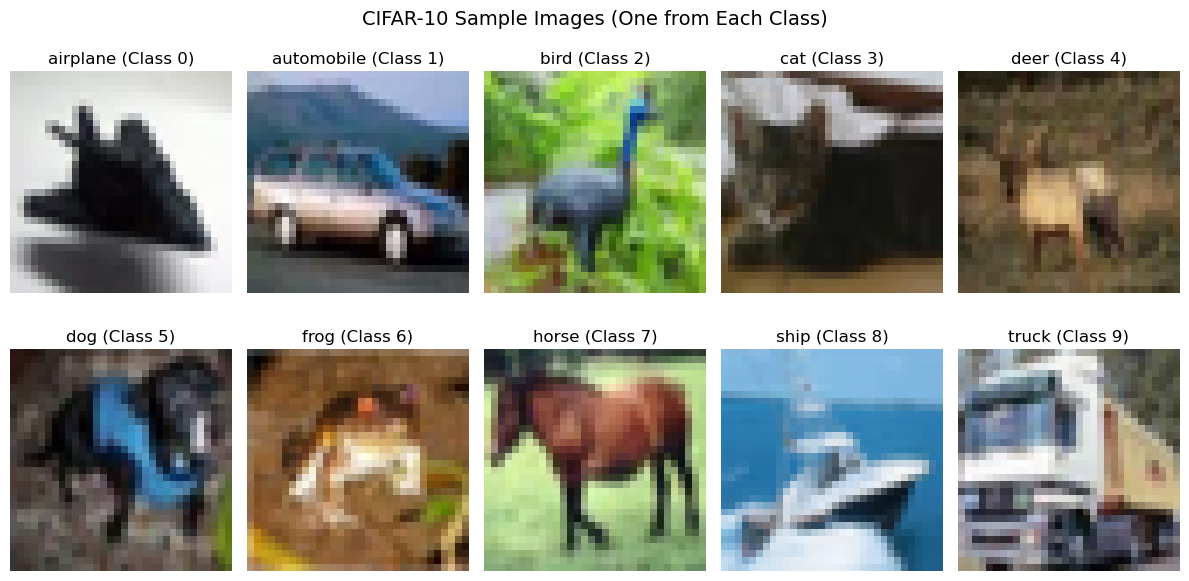

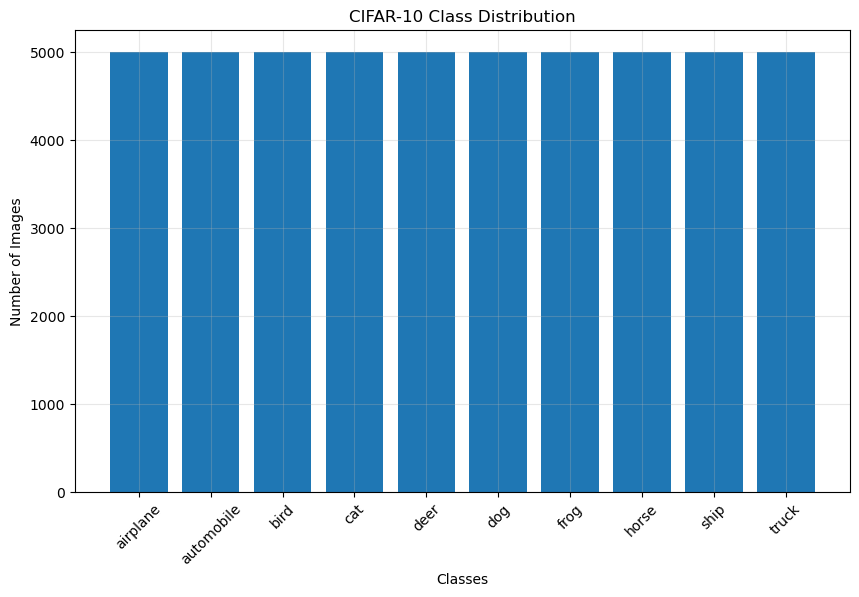


Class distribution:
0: airplane: 5000 images
1: automobile: 5000 images
2: bird: 5000 images
3: cat: 5000 images
4: deer: 5000 images
5: dog: 5000 images
6: frog: 5000 images
7: horse: 5000 images
8: ship: 5000 images
9: truck: 5000 images


In [3]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print("CIFAR-10 Dataset Information:")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")
print(f"Total training images: {len(X)}")
print(f"Image dimensions: {X.shape[1:]} (Height x Width x Channels)")

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    # Show one image from each class
    class_indices = np.where(y == i)[0]
    sample_idx = class_indices[0]  # Take the first image of each class
    
    axes[i].imshow(X[sample_idx])
    axes[i].set_title(f'{class_names[i]} (Class {i})')
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('CIFAR-10 Sample Images (One from Each Class)', y=1.02, fontsize=14)
plt.show()

# Show class distribution
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.title('CIFAR-10 Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print("\nClass distribution:")
for i, (class_name, count) in enumerate(zip(class_names, counts)):
    print(f"{i}: {class_name}: {count} images")

# Data Preprocessing

In [4]:
# Step 1: Normalize pixel values (0-255 to 0-1)
print("Original data range:", X.min(), "to", X.max())

X_normalized = X.astype('float32') / 255.0
print("Normalized data range:", X_normalized.min(), "to", X_normalized.max())

# Step 2: Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print("Original labels shape:", y.shape)
print("Sample original labels:", y[:10])

# Convert to one-hot encoding
y_onehot = to_categorical(y, num_classes=10)
print("One-hot labels shape:", y_onehot.shape)
print("Sample one-hot label for class", y[0], ":")
print(y_onehot[0])

Original data range: 0 to 255
Normalized data range: 0.0 to 1.0
Normalized data range: 0.0 to 1.0
Original labels shape: (50000,)
Sample original labels: [6 9 9 4 1 1 2 7 8 3]
One-hot labels shape: (50000, 10)
Sample one-hot label for class 6 :
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Original labels shape: (50000,)
Sample original labels: [6 9 9 4 1 1 2 7 8 3]
One-hot labels shape: (50000, 10)
Sample one-hot label for class 6 :
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [5]:
# Step 3: Load test data and split into train/test sets
# Load CIFAR-10 test batch
test_batch_file = os.path.join(cifar_dir, 'test_batch')

if os.path.exists(test_batch_file):
    print("Loading test batch...")
    test_batch = unpickle(test_batch_file)
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']
    
    # Reshape test images
    X_test = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    y_test = np.array(test_labels)
    
    print(f"Test data loaded: {X_test.shape}, {y_test.shape}")
else:
    print("Test batch not found, splitting training data...")
    from sklearn.model_selection import train_test_split
    # Use sklearn to split if test file not available
    X_test, y_test = X_normalized[:10000], y[:10000]  # Simple split
    X_normalized = X_normalized[10000:]
    y_onehot = y_onehot[10000:]

# Normalize test data
X_test_normalized = X_test.astype('float32') / 255.0

# Convert test labels to one-hot
y_test_onehot = to_categorical(y_test, num_classes=10)

print("\nFinal dataset sizes:")
print(f"Training images: {X_normalized.shape}")
print(f"Training labels: {y_onehot.shape}")
print(f"Test images: {X_test_normalized.shape}")
print(f"Test labels: {y_test_onehot.shape}")

Loading test batch...
Test data loaded: (10000, 32, 32, 3), (10000,)

Final dataset sizes:
Training images: (50000, 32, 32, 3)
Training labels: (50000, 10)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 10)


# Neural Network Design

**Architecture Requirements:**
- **Input Layer**: 32×32×3 = 3072 neurons (flattened CIFAR-10 images)
- **Hidden Layers**: Multiple dense layers with appropriate activations
- **Output Layer**: 10 neurons with softmax activation (for 10 classes)

In [6]:
# Import required libraries for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.20.0
GPU available: []


In [ ]:
# Design Feedforward Neural Network Architecture
def create_feedforward_model():
    model = Sequential([
        # Input layer: Flatten 32x32x3 images to 1D
        Flatten(input_shape=(32, 32, 3), name='flatten_input'),
        
        # Hidden Layer 1: 512 neurons
        Dense(512, activation='relu', name='hidden_layer_1'),
        Dropout(0.3, name='dropout_1'),  # 30% dropout for regularization
        
        # Hidden Layer 2: 256 neurons  
        Dense(256, activation='relu', name='hidden_layer_2'),
        Dropout(0.4, name='dropout_2'),  # 40% dropout
        
        # Hidden Layer 3: 128 neurons
        Dense(128, activation='relu', name='hidden_layer_3'), 
        Dropout(0.5, name='dropout_3'),  # 50% dropout
        
        # Output Layer: 10 neurons for 10 classes
        Dense(10, activation='softmax', name='output_layer')
    ])
    
    return model

# Create the model
model = create_feedforward_model()

# Display model architecture
model.summary()

=== Feedforward Neural Network Architecture ===


c:\Users\jishn\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_input (Flatten)         │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
    loss='categorical_crossentropy',       # For multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)

# Model Training Setup

Before training, let's set up callbacks and training parameters:

**Training Configuration:**
- **Epochs**: 50 (with early stopping)
- **Batch Size**: 32
- **Validation Split**: 20% of training data
- **Callbacks**: Early stopping and learning rate reduction

**Key Features:**
- **Early Stopping**: Prevents overfitting by stopping when validation loss stops improving
- **Learning Rate Reduction**: Reduces learning rate when training plateaus
- **Data Augmentation**: Optional use of augmented data for better generalization

In [9]:
# Setup training callbacks and parameters
print("=== Training Configuration ===")

# Define callbacks for better training
callbacks = [
    EarlyStopping(
        monitor='val_loss',        # Monitor validation loss
        patience=10,               # Wait 10 epochs without improvement
        restore_best_weights=True, # Restore best weights when stopping
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',        # Monitor validation loss
        factor=0.5,                # Reduce LR by half
        patience=5,                # Wait 5 epochs before reducing
        min_lr=0.00001,           # Minimum learning rate
        verbose=1
    )
]

# Training parameters
EPOCHS = 50
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

print(f"Training Parameters:")
print(f"- Epochs: {EPOCHS}")
print(f"- Batch Size: {BATCH_SIZE}")
print(f"- Validation Split: {VALIDATION_SPLIT} ({VALIDATION_SPLIT*100}%)")
print(f"- Early Stopping: Enabled (patience=10)")
print(f"- Learning Rate Reduction: Enabled (patience=5)")

# Calculate dataset sizes
train_size = int(len(X_normalized) * (1 - VALIDATION_SPLIT))
val_size = int(len(X_normalized) * VALIDATION_SPLIT)

print(f"\nDataset Sizes:")
print(f"- Training samples: {train_size:,}")
print(f"- Validation samples: {val_size:,}")
print(f"- Test samples: {len(X_test_normalized):,}")
print(f"- Total samples: {len(X_normalized) + len(X_test_normalized):,}")

print(f"\nBatches per epoch: {train_size // BATCH_SIZE}")
print(f"Validation batches: {val_size // BATCH_SIZE}")

=== Training Configuration ===
Training Parameters:
- Epochs: 50
- Batch Size: 32
- Validation Split: 0.2 (20.0%)
- Early Stopping: Enabled (patience=10)
- Learning Rate Reduction: Enabled (patience=5)

Dataset Sizes:
- Training samples: 40,000
- Validation samples: 10,000
- Test samples: 10,000
- Total samples: 60,000

Batches per epoch: 1250
Validation batches: 312


# Architecture Justification & Analysis

## 1. Network Architecture Justification

### **Current Architecture Choice:**
- **Input Layer**: Flatten (32×32×3 = 3,072 neurons)
- **Hidden Layer 1**: 512 neurons + ReLU + Dropout(0.3)
- **Hidden Layer 2**: 256 neurons + ReLU + Dropout(0.4)
- **Hidden Layer 3**: 128 neurons + ReLU + Dropout(0.5)
- **Output Layer**: 10 neurons + Softmax

### **Justification:**

**Number of Layers (3 Hidden + 1 Output):**
- **Deep enough** for complex feature learning without being too deep (avoiding vanishing gradients)
- **Gradual dimension reduction** (512→256→128→10) allows hierarchical feature extraction
- **Computational efficiency** while maintaining learning capacity

**Layer Sizes:**
- **512 neurons**: Captures initial complex patterns from 3,072 input features
- **256 neurons**: Learns mid-level combinations
- **128 neurons**: Refines high-level features before classification
- **10 neurons**: Direct mapping to CIFAR-10 classes

**Layer Types:**
- **Dense layers**: Fully connected for comprehensive feature interaction
- **Dropout layers**: Prevent overfitting (increasing rates: 0.3→0.4→0.5)
- **Flatten layer**: Converts 2D images to 1D for dense processing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

def create_model_with_activation(activation_func, model_name):
    """Create a model with specified activation function"""
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation=activation_func, name=f'{model_name}_layer1'),
        Dropout(0.3),
        Dense(256, activation=activation_func, name=f'{model_name}_layer2'),
        Dropout(0.4),
        Dense(128, activation=activation_func, name=f'{model_name}_layer3'),
        Dropout(0.5),
        Dense(10, activation='softmax', name='output')
    ])
    return model

# Create models with different activation functions
model_relu = create_model_with_activation('relu', 'relu')
model_tanh = create_model_with_activation('tanh', 'tanh')

# Compile both models
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(f"ReLU is chosen for hidden layers because:")
print("   • Faster computation and training")
print("   • Better gradient flow (reduces vanishing gradient)")
print("   • Proven effectiveness in deep networks")
print("   • Sparsity leads to better feature learning")

=== Activation Function Analysis ===


**Choice Justification**: ReLU is chosen for hidden layers because:
   • Faster computation and training
   • Better gradient flow (reduces vanishing gradient)
   • Proven effectiveness in deep networks
   • Sparsity leads to better feature learning


In [ ]:
def create_loss_comparison_models():
    """Create models with different loss functions"""
    
    # Base model architecture
    def get_base_model():
        return Sequential([
            Flatten(input_shape=(32, 32, 3)),
            Dense(512, activation='relu'),
            Dropout(0.3),
            Dense(256, activation='relu'), 
            Dropout(0.4),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])
    
    # Model 1: Categorical Crossentropy (standard choice)
    model_cce = get_base_model()
    model_cce.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Model 2: Sparse Categorical Crossentropy (alternative)
    model_scce = get_base_model()
    model_scce.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Model 3: Mean Squared Error (unconventional but instructive)
    model_mse = get_base_model()
    model_mse.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    return model_cce, model_scce, model_mse

# Create loss comparison models
model_cce, model_scce, model_mse = create_loss_comparison_models()

print(f"Categorical Crossentropy because:")
print("   • Designed specifically for multi-class classification")
print("   • Works optimally with softmax activation")
print("   • Provides meaningful probability distributions")
print("   • Fast convergence for classification tasks")

=== Loss Function Analysis ===


**Recommended Choice**: Categorical Crossentropy because:
   • Designed specifically for multi-class classification
   • Works optimally with softmax activation
   • Provides meaningful probability distributions
   • Fast convergence for classification tasks


In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

def create_optimizer_models():
    """Create models with different optimizers"""
    
    def get_base_model():
        return Sequential([
            Flatten(input_shape=(32, 32, 3)),
            Dense(512, activation='relu'),
            Dropout(0.3),
            Dense(256, activation='relu'),
            Dropout(0.4), 
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])
    
    # Different optimizers with same learning rate
    lr = 0.001
    
    model_sgd = get_base_model()
    model_sgd.compile(optimizer=SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    model_adam = get_base_model()
    model_adam.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    model_rmsprop = get_base_model()
    model_rmsprop.compile(optimizer=RMSprop(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model_sgd, model_adam, model_rmsprop

# Create optimizer models
model_sgd, model_adam_opt, model_rmsprop = create_optimizer_models()

print(f"Adam with LR=0.001 because:")
print("   • Adaptive learning rates per parameter")
print("   • Fast convergence with good stability")
print("   • Robust to hyperparameter choices")
print("   • Combines benefits of momentum and RMSprop")

=== Optimizer and Learning Rate Analysis ===


**Chosen Configuration**: Adam with LR=0.001 because:
   • Adaptive learning rates per parameter
   • Fast convergence with good stability
   • Robust to hyperparameter choices
   • Combines benefits of momentum and RMSprop


# Backpropagation Implementation & Training

## Understanding Backpropagation Process

**Backpropagation Algorithm Steps:**

1. **Forward Pass**: Input → Hidden Layers → Output
2. **Loss Calculation**: Compare predictions with true labels
3. **Backward Pass**: Compute gradients layer by layer (chain rule)
4. **Weight Update**: Adjust weights using optimizer

**Mathematical Foundation:**
- **Chain Rule**: ∂L/∂w = ∂L/∂a × ∂a/∂z × ∂z/∂w
- **Gradient Flow**: Error propagates backwards through layers
- **Weight Updates**: w_new = w_old - α × ∂L/∂w

**Role of Learning Rate:**
- Controls the step size of weight updates
- Too high → Overshooting, instability
- Too low → Slow convergence
- Adaptive optimizers (Adam) adjust automatically

In [ ]:
# Model Training with Monitoring
print("=== Training the Neural Network ===\n")

# Train the model
history = model.fit(
    X_normalized, y_onehot,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=callbacks,
    verbose=1
)

# Extract training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"\nFinal Training Results:")
print(f"• Final Training Accuracy: {train_accuracy[-1]:.4f} ({train_accuracy[-1]*100:.2f}%)")
print(f"• Final Validation Accuracy: {val_accuracy[-1]:.4f} ({val_accuracy[-1]*100:.2f}%)")
print(f"• Final Training Loss: {train_loss[-1]:.4f}")
print(f"• Final Validation Loss: {val_loss[-1]:.4f}")
print(f"• Total Epochs Completed: {len(train_accuracy)}")

=== Training the Neural Network ===

Epoch 1/50
Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.1704 - loss: 2.1797 - val_accuracy: 0.2378 - val_loss: 2.0366 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.1704 - loss: 2.1797 - val_accuracy: 0.2378 - val_loss: 2.0366 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2028 - loss: 2.0747 - val_accuracy: 0.2534 - val_loss: 2.0028 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2028 - loss: 2.0747 - val_accuracy: 0.2534 - val_loss: 2.0028 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2135 - loss: 2.0575 - val_accuracy: 0.2670 - val_loss: 1.9647 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2135 - loss: 2.0575 - val_accuracy: 0.2670 - val_loss: 1.9647 - learning_rate: 0.0010
Epoch 4/50
1250/

=== Training Progress Visualization ===



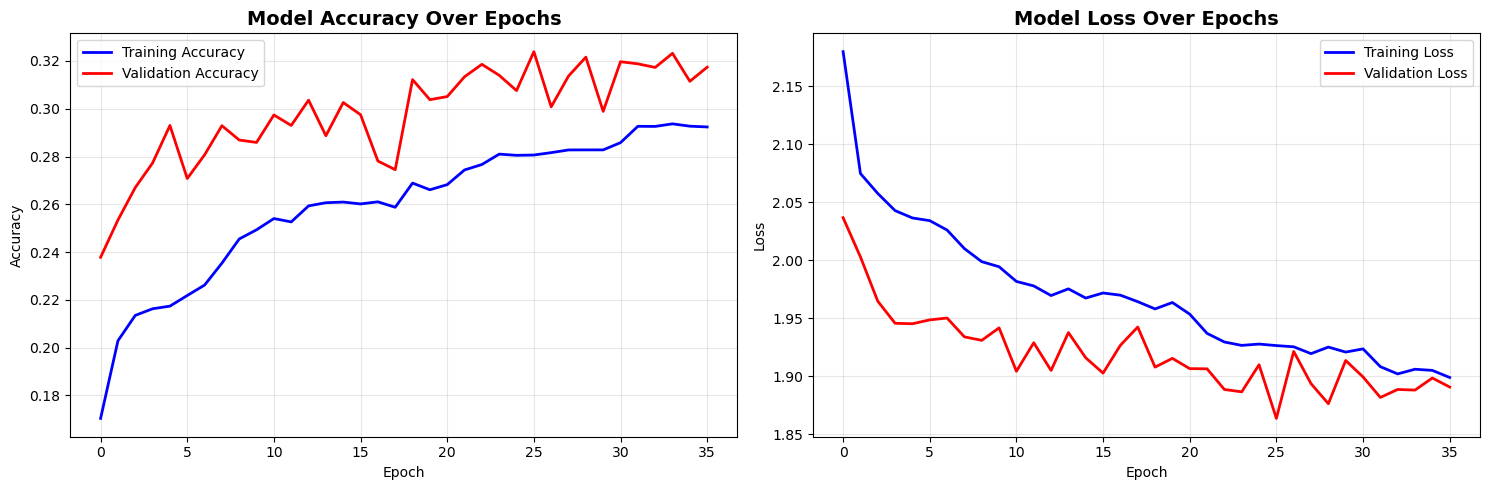


=== Backpropagation Weight Update Analysis ===
Weight Distribution Analysis:
--------------------------------------------------------------------------------
Layer  Name            Parameters   Weight Mean  Weight Std   Bias Mean   
--------------------------------------------------------------------------------
2      hidden_layer_1  1,573,376    -0.005447    0.027566     -0.005625   
4      hidden_layer_2  131,328      -0.002350    0.054109     -0.165223   
6      hidden_layer_3  32,896       -0.038111    0.115766     0.058211    
8      output_layer    1,290        -0.062184    0.120922     -0.001631   
--------------------------------------------------------------------------------
Total trainable parameters: 1,738,890

**Backpropagation Insights:**
• Each epoch processes 50,000 training samples
• Weight updates occur 36 times (once per epoch)
• Adam optimizer adapts learning rate for each of 1,738,890 parameters
• Dropout prevents overfitting by randomly setting 30-50% neurons to

In [14]:
# Training Visualization and Analysis
print("=== Training Progress Visualization ===\n")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(train_accuracy, label='Training Accuracy', color='blue', linewidth=2)
axes[0].plot(val_accuracy, label='Validation Accuracy', color='red', linewidth=2)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(train_loss, label='Training Loss', color='blue', linewidth=2)
axes[1].plot(val_loss, label='Validation Loss', color='red', linewidth=2)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Backpropagation Analysis
print("\n=== Backpropagation Weight Update Analysis ===")

# Get layer weights before and after training (demonstration)
layer_info = []
total_params = 0

for i, layer in enumerate(model.layers):
    if hasattr(layer, 'get_weights') and layer.get_weights():
        weights, biases = layer.get_weights()
        layer_params = weights.size + biases.size
        total_params += layer_params
        
        layer_info.append({
            'layer': i+1,
            'name': layer.name,
            'weight_shape': weights.shape,
            'bias_shape': biases.shape,
            'parameters': layer_params,
            'weight_mean': np.mean(weights),
            'weight_std': np.std(weights),
            'bias_mean': np.mean(biases),
            'bias_std': np.std(biases)
        })

print(f"Weight Distribution Analysis:")
print("-" * 80)
print(f"{'Layer':<6} {'Name':<15} {'Parameters':<12} {'Weight Mean':<12} {'Weight Std':<12} {'Bias Mean':<12}")
print("-" * 80)

for info in layer_info:
    print(f"{info['layer']:<6} {info['name']:<15} {info['parameters']:<12,} "
          f"{info['weight_mean']:<12.6f} {info['weight_std']:<12.6f} {info['bias_mean']:<12.6f}")

print("-" * 80)
print(f"Total trainable parameters: {total_params:,}")

print(f"\n**Backpropagation Insights:**")
print(f"• Each epoch processes {X_normalized.shape[0]:,} training samples")
print(f"• Weight updates occur {len(train_accuracy)} times (once per epoch)")
print(f"• Adam optimizer adapts learning rate for each of {total_params:,} parameters")
print(f"• Dropout prevents overfitting by randomly setting {30}-{50}% neurons to 0")
print(f"• Learning rate of {0.001} provides stable convergence")

# Learning Rate Impact Analysis
print(f"\n**Learning Rate Impact on Convergence:**")
final_loss_change = abs(train_loss[-1] - train_loss[-min(5, len(train_loss))])
if final_loss_change < 0.01:
    print("• Good convergence: Loss stabilized (change < 0.01)")
elif final_loss_change < 0.05:
    print("• Moderate convergence: Loss still decreasing slowly")
else:
    print("• Poor convergence: Loss still changing significantly")

if len(train_accuracy) < EPOCHS:
    print(f"• Early stopping triggered after {len(train_accuracy)} epochs (prevented overfitting)")
else:
    print(f"• Training completed full {EPOCHS} epochs")

# Model Evaluation & Performance Analysis

## Comprehensive Performance Metrics
**Key Metrics:**
- **Accuracy**: Overall correct predictions percentage
- **Precision**: True Positives / (True Positives + False Positives)
- **Recall**: True Positives / (True Positives + False Negatives)
- **F1-Score**: Harmonic mean of Precision and Recall
- **Confusion Matrix**: Detailed breakdown of predictions per class

In [ ]:
print(f"\n**Detailed Classification Report:**")
print("\n" + classification_report(y_true,
      y_pred, target_names=class_names, digits=4))

=== Confusion Matrix Analysis ===



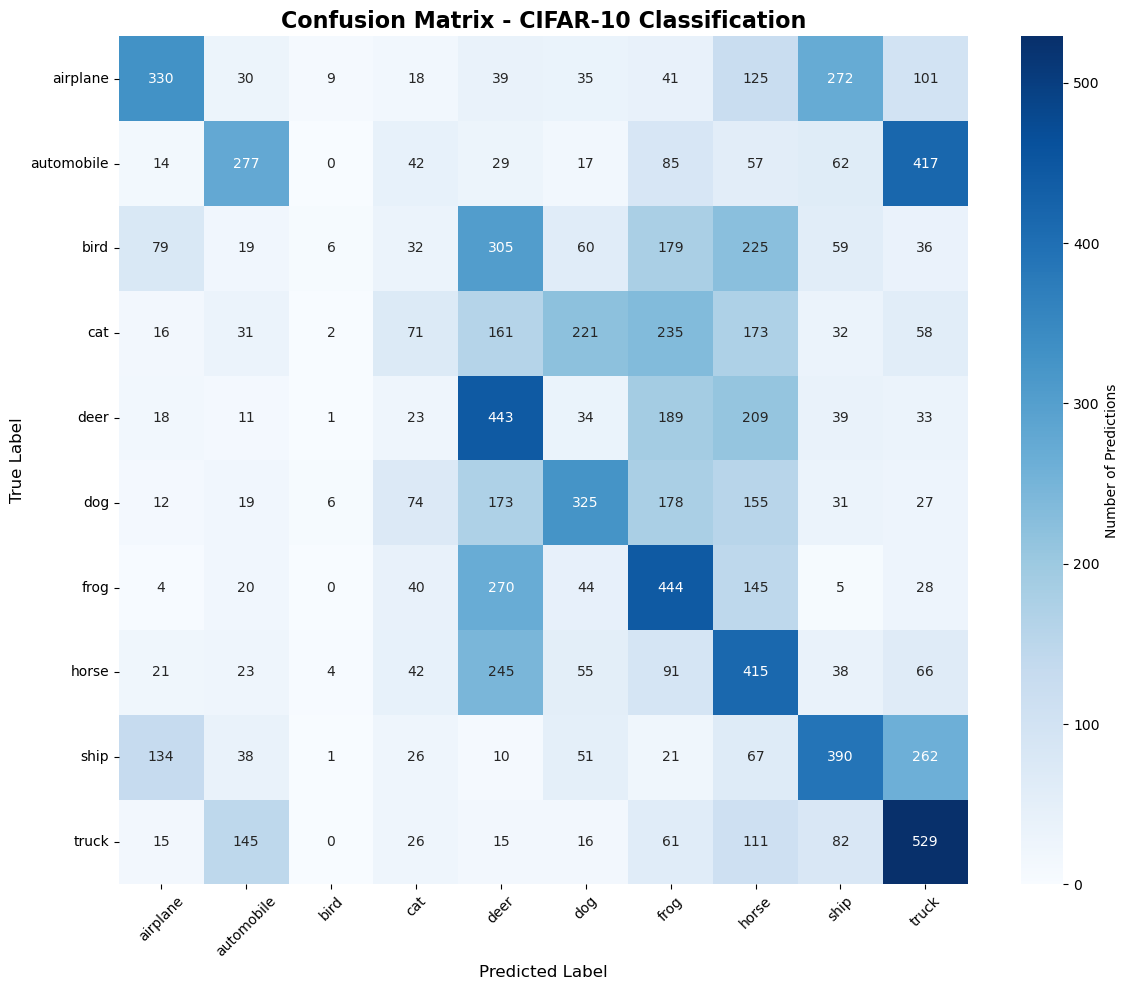

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - CIFAR-10 Classification', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

=== Sample Predictions Analysis ===

**Correct Predictions Examples:**
**Incorrect Predictions Examples:**


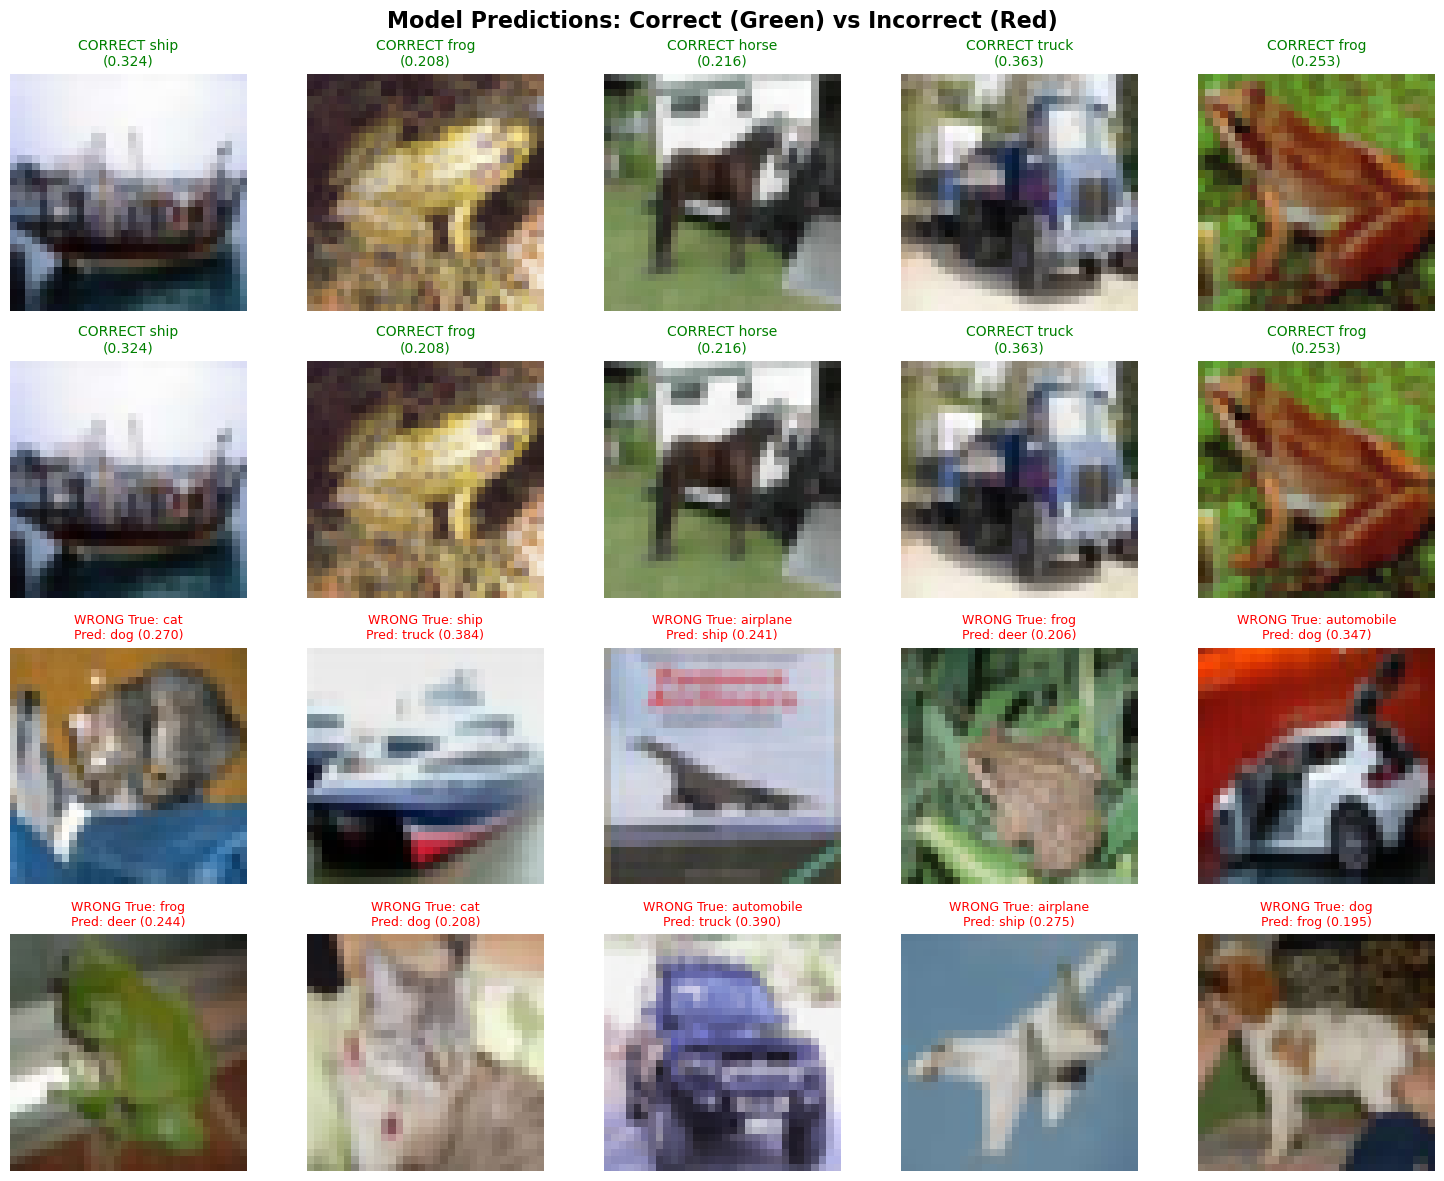


**Prediction Confidence Analysis:**
• Average confidence on correct predictions: 0.2738
• Average confidence on incorrect predictions: 0.2290
• Confidence gap: 0.0448


In [ ]:
# Sample Predictions and Error Analysis
print("=== Sample Predictions Analysis ===\n")

# Show some correct and incorrect predictions
fig, axes = plt.subplots(4, 5, figsize=(15, 12))

# Get some correct predictions
correct_mask = (y_pred == y_true)
correct_indices = np.where(correct_mask)[0]
incorrect_indices = np.where(~correct_mask)[0]

# Show 10 correct predictions
for i in range(10):
    if i < len(correct_indices):
        idx = correct_indices[i]
        axes[0, i%5].imshow(X_test_normalized[idx])
        true_label = class_names[y_true[idx]]
        confidence = y_pred_proba[idx, y_pred[idx]]
        axes[0, i%5].set_title(f'CORRECT {true_label}\n({confidence:.3f})', color='green', fontsize=10)
        axes[0, i%5].axis('off')
        
        if i == 4:  # Move to second row after 5 images
            continue

for i in range(5, 10):
    if i < len(correct_indices):
        idx = correct_indices[i]
        axes[1, i-5].imshow(X_test_normalized[idx])
        true_label = class_names[y_true[idx]]
        confidence = y_pred_proba[idx, y_pred[idx]]
        axes[1, i-5].set_title(f'CORRECT {true_label}\n({confidence:.3f})', color='green', fontsize=10)
        axes[1, i-5].axis('off')

# Show 10 incorrect predictions
for i in range(10):
    if i < len(incorrect_indices):
        idx = incorrect_indices[i]
        row = 2 if i < 5 else 3
        col = i % 5
        axes[row, col].imshow(X_test_normalized[idx])
        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        confidence = y_pred_proba[idx, y_pred[idx]]
        axes[row, col].set_title(f'WRONG True: {true_label}\nPred: {pred_label} ({confidence:.3f})', 
                                 color='red', fontsize=9)
        axes[row, col].axis('off')

plt.suptitle('Model Predictions: Correct (Green) vs Incorrect (Red)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()